Вариант 3 Вывести распределение стоимости в зависимости от материала стен.

In [12]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import mannwhitneyu, kruskal

# Загрузка данных
try:
    df = pd.read_csv('/home/Rent.csv', sep=';')
    print("✅ Данные успешно загружены. Размер данных:", df.shape)
    print("\nПервые 5 строк:")
    display(df.head())
except FileNotFoundError:
    print("❌ Ошибка: файл Rent.csv не найден!")
    exit()

✅ Данные успешно загружены. Размер данных: (130, 6)

Первые 5 строк:


,rent,s,floor,rooms,walls,district
0,24000,50.0,5,2,1,1
1,11250,15.0,1,1,0,2
2,30000,69.0,2,2,1,1
3,19500,39.0,12,1,0,4
4,12000,18.0,3,1,1,3


In [13]:
# Переименование столбцов для удобства (если нужно)
df.columns = ['rent', 'area', 'floor', 'rooms', 'walls', 'district']

# Проверка структуры
print("\n🔍 Структура данных:")
print(f"Всего записей: {len(df)}")
print(f"Колонки: {list(df.columns)}")
print("\nТипы данных:")
print(df.dtypes)

# Проверка пропущенных значений
print("\nПропущенные значения:")
print(df.isnull().sum())


🔍 Структура данных:
Всего записей: 130
Колонки: ['rent', 'area', 'floor', 'rooms', 'walls', 'district']

Типы данных:
rent          int64
area        float64
floor         int64
rooms         int64
walls         int64
district      int64
dtype: object

Пропущенные значения:
rent        0
area        0
floor       0
rooms       0
walls       0
district    0
dtype: int64


In [14]:
# Категориальные переменные
cat_vars = ['walls', 'district', 'rooms']
print("\n📊 Категориальные переменные:")
for var in cat_vars:
    print(f"{var}: {df[var].nunique()} уникальных значений")

# Числовые переменные
num_vars = ['rent', 'area', 'floor']
print("\n📈 Числовые переменные:")
display(df[num_vars].describe())


📊 Категориальные переменные:
walls: 2 уникальных значений
district: 4 уникальных значений
rooms: 3 уникальных значений

📈 Числовые переменные:


,rent,area,floor
count,130.000000,130.000000,130.000000
mean,17859.615385,36.439231,4.153846
std,5552.428396,15.753831,2.680569
min,9000.000000,11.000000,1.000000
25%,13500.000000,21.250000,2.000000
50%,18000.000000,36.000000,3.000000
75%,21000.000000,45.000000,5.000000
max,30000.000000,70.000000,12.000000


<ipython-input-15-d22b23b172a3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='walls', y='rent', data=df, palette='Set2')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


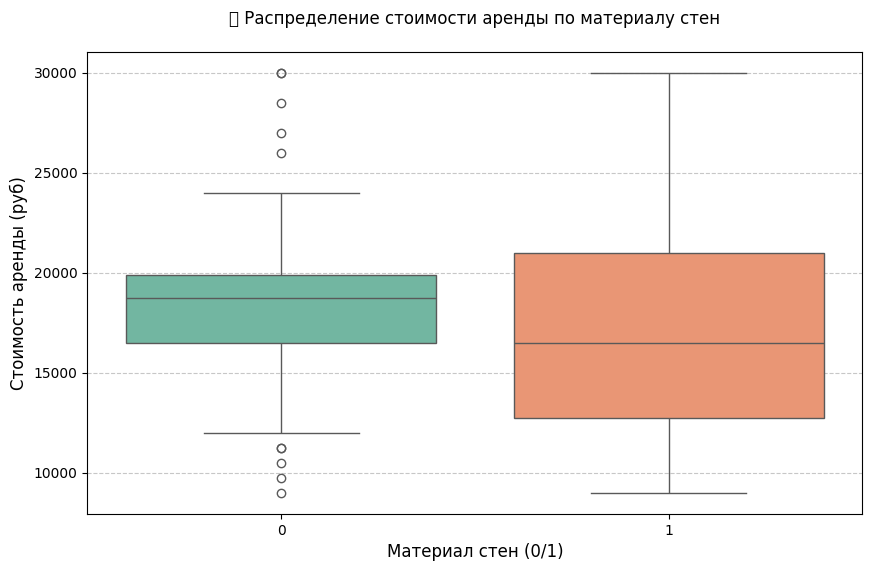

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


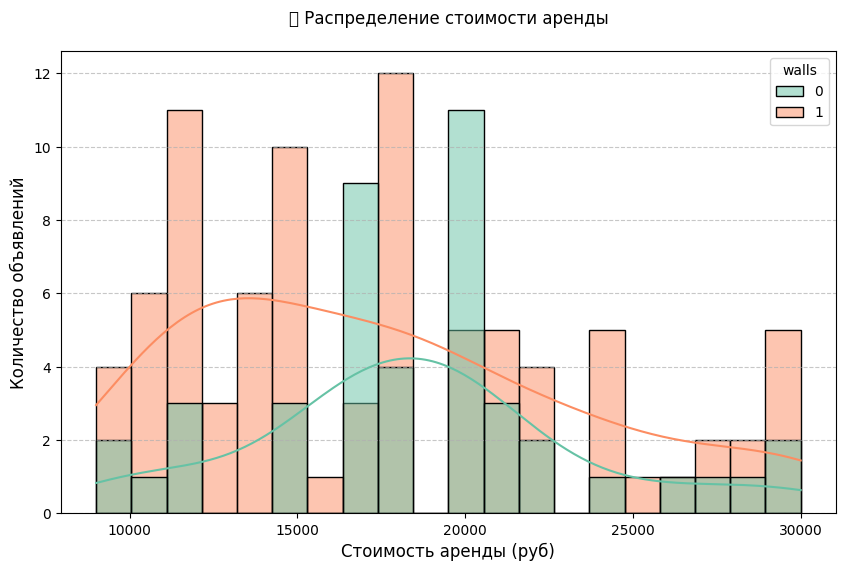

In [15]:
# Boxplot стоимости аренды по материалу стен
plt.figure(figsize=(10, 6))
sns.boxplot(x='walls', y='rent', data=df, palette='Set2')
plt.title('📦 Распределение стоимости аренды по материалу стен', pad=20)
plt.xlabel('Материал стен (0/1)', fontsize=12)
plt.ylabel('Стоимость аренды (руб)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Гистограмма распределения стоимости
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='rent', hue='walls', kde=True, bins=20, palette='Set2')
plt.title('📊 Распределение стоимости аренды', pad=20)
plt.xlabel('Стоимость аренды (руб)', fontsize=12)
plt.ylabel('Количество объявлений', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [16]:
# Расчет показателей для стоимости аренды
print("\n📐 Показатели распределения стоимости аренды:")
print(f"Среднее значение: {df['rent'].mean():.2f} руб")
print(f"Медиана: {df['rent'].median():.2f} руб")
print(f"Стандартное отклонение: {df['rent'].std():.2f} руб")

# Коэффициенты асимметрии и эксцесса
print("\n📊 Коэффициенты формы распределения:")
print(f"Асимметрия (skewness): {df['rent'].skew():.2f}")
print(f"Эксцесс (kurtosis): {df['rent'].kurtosis():.2f}")

# Интерпретация
print("\n🔍 Интерпретация:")
print("Нормальное распределение: skewness ≈ 0 (±1), kurtosis ≈ 3 (±1)")
if abs(df['rent'].skew()) <= 1:
    print("→ Асимметрия в пределах нормы")
else:
    print("→ Заметная асимметрия распределения")

if abs(df['rent'].kurtosis() - 3) <= 1:
    print("→ Эксцесс близок к нормальному")
else:
    print("→ Заметное отклонение эксцесса")


📐 Показатели распределения стоимости аренды:
Среднее значение: 17859.62 руб
Медиана: 18000.00 руб
Стандартное отклонение: 5552.43 руб

📊 Коэффициенты формы распределения:
Асимметрия (skewness): 0.51
Эксцесс (kurtosis): -0.37

🔍 Интерпретация:
Нормальное распределение: skewness ≈ 0 (±1), kurtosis ≈ 3 (±1)
→ Асимметрия в пределах нормы
→ Заметное отклонение эксцесса



🔬 Тест на нормальность (Д'Агостино):
Статистика = 6.460, p-value = 0.0396
👉 Отвергаем H0: распределение не нормальное


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


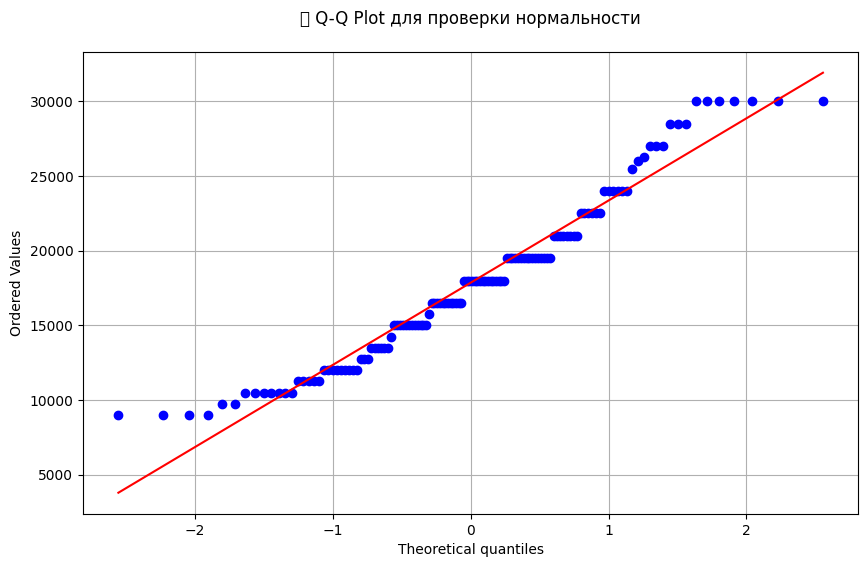

In [17]:
# Тест Д'Агостино
stat, p = stats.normaltest(df['rent'])
print("\n🔬 Тест на нормальность (Д'Агостино):")
print(f"Статистика = {stat:.3f}, p-value = {p:.4f}")

alpha = 0.05
if p > alpha:
    print("👉 Не отвергаем H0: распределение нормальное")
else:
    print("👉 Отвергаем H0: распределение не нормальное")

# Q-Q plot для визуальной проверки
plt.figure(figsize=(10, 6))
stats.probplot(df['rent'], dist="norm", plot=plt)
plt.title('📉 Q-Q Plot для проверки нормальности', pad=20)
plt.grid(True)
plt.show()


📌 Матрица корреляций:


,rent,area,floor,rooms,walls,district
rent,1.000000,0.831727,0.337141,0.601784,-0.092368,0.044103
area,0.831727,1.000000,0.403467,0.737813,-0.231806,-0.051841
floor,0.337141,0.403467,1.000000,0.153052,-0.147517,0.049660
rooms,0.601784,0.737813,0.153052,1.000000,-0.250510,-0.046718
walls,-0.092368,-0.231806,-0.147517,-0.250510,1.000000,0.009679
district,0.044103,-0.051841,0.049660,-0.046718,0.009679,1.000000


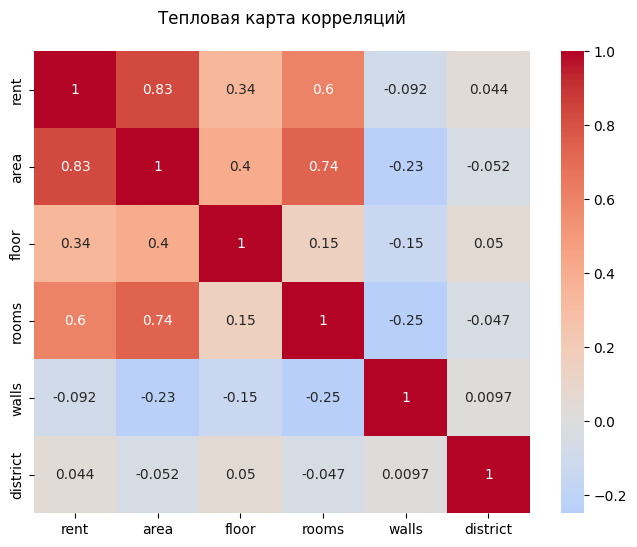


🔍 Сравнение стоимости по группам:
Среднее для стен=0: 18573.86 руб
Среднее для стен=1: 17494.19 руб

Тест Манна-Уитни: p-value = 0.1495
👉 Нет значимых различий между группами


In [18]:
# Корреляционный анализ
print("\n📌 Матрица корреляций:")
display(df.corr())

# Визуализация корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Тепловая карта корреляций', pad=20)
plt.show()

# Сравнение групп (материал стен vs стоимость)
print("\n🔍 Сравнение стоимости по группам:")
group_0 = df[df['walls'] == 0]['rent']
group_1 = df[df['walls'] == 1]['rent']

print(f"Среднее для стен=0: {group_0.mean():.2f} руб")
print(f"Среднее для стен=1: {group_1.mean():.2f} руб")

# Тест Манна-Уитни (непараметрический)
stat, p = mannwhitneyu(group_0, group_1)
print(f"\nТест Манна-Уитни: p-value = {p:.4f}")
if p > alpha:
    print("👉 Нет значимых различий между группами")
else:
    print("👉 Есть значимые различия между группами")

In [19]:
# Гипотезы:
print("\n🧪 Формулировка гипотез:")
print("H0: Материал стен не влияет на стоимость аренды (μ0 = μ1)")
print("H1: Материал стен влияет на стоимость аренды (μ0 ≠ μ1)")

# Проверка гипотез
print("\n🔎 Проверка гипотез:")
print("1. Тест Шапиро-Уилка на нормальность:")
_, p0 = stats.shapiro(group_0)
_, p1 = stats.shapiro(group_1)
print(f"Стены=0: p-value = {p0:.4f}")
print(f"Стены=1: p-value = {p1:.4f}")

if p0 > alpha and p1 > alpha:
    print("→ Обе группы нормальные → используем t-тест")
    stat, p = stats.ttest_ind(group_0, group_1)
else:
    print("→ Распределения не нормальные → используем Манна-Уитни")
    stat, p = mannwhitneyu(group_0, group_1)

print(f"\nРезультат теста: p-value = {p:.4f}")
if p > alpha:
    print("👉 Принимаем H0: нет значимых различий")
else:
    print("👉 Отвергаем H0: есть значимые различия")


🧪 Формулировка гипотез:
H0: Материал стен не влияет на стоимость аренды (μ0 = μ1)
H1: Материал стен влияет на стоимость аренды (μ0 ≠ μ1)

🔎 Проверка гипотез:
1. Тест Шапиро-Уилка на нормальность:
Стены=0: p-value = 0.0354
Стены=1: p-value = 0.0003
→ Распределения не нормальные → используем Манна-Уитни

Результат теста: p-value = 0.1495
👉 Принимаем H0: нет значимых различий


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


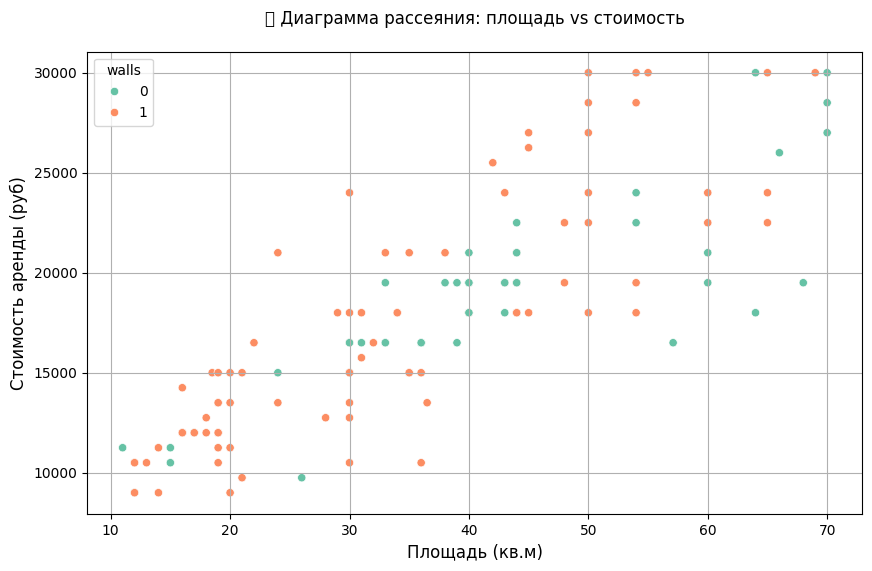


📈 Регрессионная модель:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     149.9
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           3.74e-34
Time:                        20:59:49   Log-Likelihood:                -1226.0
No. Observations:                 130   AIC:                             2458.
Df Residuals:                     127   BIC:                             2467.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6041.0844    861.488      7.012      0.000    4336.355    7745.814
walls       1240.5966    581.649      2.133      0.035      89.619    2391.574
area         301.8129     17.538     17.209      0.000     267.108     336.518
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   2.356
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                0.784
Skew:                           0.071   Prob(JB):                        0.676
Kurtosis:                       3.353   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


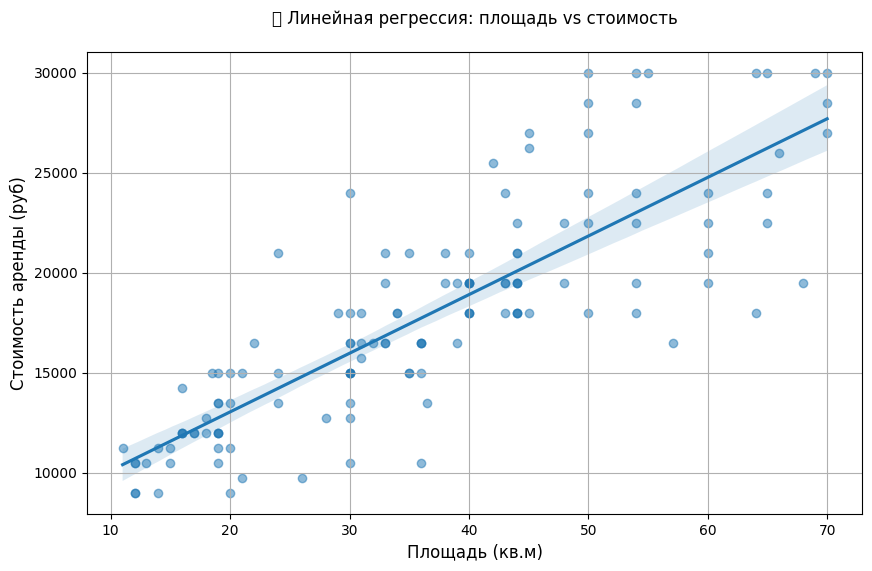

In [20]:
# Диаграмма рассеяния перед регрессией
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='rent', hue='walls', data=df, palette='Set2')
plt.title('📊 Диаграмма рассеяния: площадь vs стоимость', pad=20)
plt.xlabel('Площадь (кв.м)', fontsize=12)
plt.ylabel('Стоимость аренды (руб)', fontsize=12)
plt.grid(True)
plt.show()

# Линейная регрессия: rent ~ walls + area
print("\n📈 Регрессионная модель:")
model = smf.ols('rent ~ walls + area', data=df).fit()
display(model.summary())

# Визуализация предсказаний
plt.figure(figsize=(10, 6))
sns.regplot(x='area', y='rent', data=df, scatter_kws={'alpha':0.5})
plt.title('📉 Линейная регрессия: площадь vs стоимость', pad=20)
plt.xlabel('Площадь (кв.м)', fontsize=12)
plt.ylabel('Стоимость аренды (руб)', fontsize=12)
plt.grid(True)
plt.show()